# Введение

Объект исследования - незастроенный участок на территории Пудомягского сельского поселения (Гатчинский район, Ленинградская область, Россия).

Вторая гипотеза менее контекстуальна в отношении соседних поселений и получает более концептуальное развитие. В проекте появляется зелёный коридор, соединяющий рекреационные объекты: старогатчинский лес и набережную реки Ижоры. Развивается туристически привлекательная территория участка. Также предусмотрена жилая застройка в большем объеме для развития существующих поселений. Важной особенностью является четкое планировочное разделение на жилой и инфраструктурный сектора.

# Подготовка данных

In [ ]:
!pip install blocksnet ipykernel -q

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 93.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.8/277.8 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 80.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.1/255.1 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 76.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.9/38.9 MB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 97.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 58.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━

In [ ]:
!pip install mapclassify -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 3.5 MB/s eta 0:00:00


In [ ]:
import geopandas as gpd

In [ ]:
import osmnx as ox

**Загрузка кварталов территории**

In [ ]:
blocks = gpd.read_file('blocks.geojson')

In [ ]:
blocks = blocks.explode(index_part=True).reset_index(drop=True)

<ipython-input-6-22b43d010506>:1: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  blocks = blocks.explode(index_part=True).reset_index(drop=True)


In [ ]:
blocks

,fid,площадь,geometry
0,1,245650,"POLYGON ((346623.030 6610712.490, 346664.990 6..."
1,2,88065,"POLYGON ((346129.832 6611304.750, 346144.103 6..."
2,3,207923,"POLYGON ((347122.993 6610255.428, 347144.115 6..."
3,4,304315,"POLYGON ((347456.726 6609919.567, 347471.714 6..."
4,5,800322,"POLYGON ((347312.231 6610598.844, 348139.273 6..."
5,6,355553,"POLYGON ((348621.556 6611860.812, 348629.309 6..."
6,7,123096,"POLYGON ((347312.231 6610598.844, 347308.043 6..."
7,8,318314,"POLYGON ((346514.378 6611488.920, 346525.493 6..."
8,9,185986,"POLYGON ((346664.990 6610812.602, 346665.611 6..."
9,10,71832,"POLYGON ((346862.226 6610254.161, 346888.329 6..."


In [ ]:
blocks.explore()

**Загрузка дорог территории**

In [ ]:
roads = gpd.read_file('highway_only.geojson')

<Axes: >

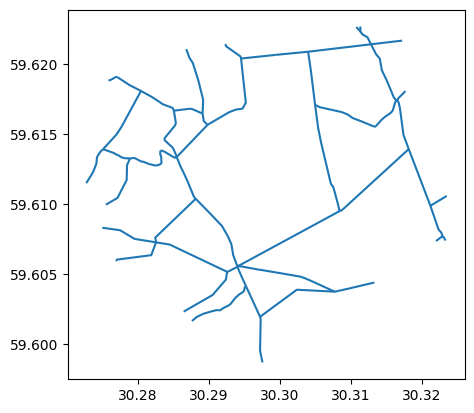

In [ ]:
roads.plot()

In [ ]:
local_crs = blocks.estimate_utm_crs()

In [ ]:
blocks = blocks.reset_index()[['geometry']].to_crs(local_crs)
roads = roads.reset_index()[['geometry']].to_crs(local_crs)

In [ ]:
roads = roads[roads.geom_type.isin(['LineString', 'MultiLineString'])]

In [ ]:
import momepy
GAP_TOLERANCE = 1
def _get_roads(roads):
    merged = roads.unary_union
    if merged.geom_type == 'MultiLineString':
        roads = gpd.GeoDataFrame(geometry=list(merged.geoms), crs=roads.crs)
    else:
        roads = gpd.GeoDataFrame(geometry=[merged], crs=roads.crs)
    roads = roads.explode(index_parts=False).reset_index(drop=True)
    roads.geometry = momepy.close_gaps(roads, GAP_TOLERANCE)
    roads = roads[roads.geom_type.isin(['LineString'])]
    return roads

roads = _get_roads(roads)
roads

,geometry
0,"LINESTRING (348965.225 6610733.631, 348959.337..."
1,"LINESTRING (348944.249 6610765.425, 348936.036..."
2,"LINESTRING (347471.874 6609825.226, 347472.019..."
3,"LINESTRING (347472.019 6609825.230, 347472.164..."
4,"LINESTRING (348944.249 6610765.425, 348935.691..."
5,"LINESTRING (348856.957 6611014.131, 348704.060..."
6,"LINESTRING (348704.060 6611467.731, 348666.028..."
7,"LINESTRING (348629.309 6611859.908, 348632.421..."
8,"LINESTRING (346925.074 6610176.807, 346963.689..."
9,"LINESTRING (347365.032 6610437.402, 347365.032..."


In [ ]:
roads.explore()

# Оценка доступности и связности кварталов

In [ ]:
CRS = 32636
SPEED_M_MIN = 1000

import networkx as nx

def _roads_to_graph(roads):
    graph = momepy.gdf_to_nx(roads)
    graph.graph['crs'] = roads.crs.to_epsg()
    graph = nx.DiGraph(graph)
    for _, _, data in graph.edges(data=True):
        geometry = data['geometry']
        data['time_min'] = geometry.length / SPEED_M_MIN
        # data['weight'] = data['mm_len'] / 1000 / 1000
        # data['length_meter'] = data['mm_len'] / 1000
    for n, data in graph.nodes(data=True):
        graph.nodes[n]['x'] = n[0]  # Assign X coordinate to node
        graph.nodes[n]['y'] = n[1]

    return graph

roads_G = _roads_to_graph(roads)
roads_G

In [ ]:
from blocksnet import AccessibilityProcessor
AccessibilityProcessor._fix_graph(roads_G)

In [ ]:
from blocksnet import AccessibilityProcessor

ap = AccessibilityProcessor(blocks)
acc_mx = ap.get_accessibility_matrix(roads_G)
acc_mx.head()

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/pyspark/pandas/__init__.py:50: UserWarning: 'PYARROW_IGNORE_TIMEZONE' environment variable was not set. It is required to set this environment variable to '1' in both driver and executor sides if you use pyarrow>=2.0.0. pandas-on-Spark will set it for you but it does not work if there is a Spark context already launched.
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.000000,2.654297,1.020508,1.020508,1.511719,1.511719,1.020508,1.240234,1.103516,0.750977,1.500977,1.959961,1.959961,2.351562,2.380859,1.751953
1,2.654297,0.000000,2.507812,2.507812,2.984375,2.984375,2.507812,1.415039,1.898438,2.238281,2.294922,1.404297,1.404297,0.861816,3.855469,0.902832
2,1.020508,2.507812,0.000000,0.000000,1.364258,1.364258,0.000000,1.092773,1.149414,0.269287,1.546875,1.812500,1.812500,2.203125,2.234375,1.604492
3,1.020508,2.507812,0.000000,0.000000,1.364258,1.364258,0.000000,1.092773,1.149414,0.269287,1.546875,1.812500,1.812500,2.203125,2.234375,1.604492
4,1.511719,2.984375,1.364258,1.364258,0.000000,0.000000,1.364258,1.570312,1.640625,1.094727,2.037109,2.291016,2.291016,2.681641,0.870117,2.082031


In [ ]:
acc_mx.to_pickle('acc_mx_2.pickle')

In [ ]:
from blocksnet.models import City

blocks['land_use'] = None

city = City(
    blocks=blocks,
    acc_mx=acc_mx
)

In [ ]:
print(city)

CRS : EPSG:32636
Blocks : 16
Service types : 0/66
Buildings : 0
Services : 0



In [ ]:
city.to_pickle('city_model_2.pickle')

In [ ]:
from blocksnet import Accessibility, Connectivity

In [ ]:
accessibility = Accessibility(city_model=city)
block = city[4] # квартал, которого считаем доступность
result = accessibility.calculate(block)

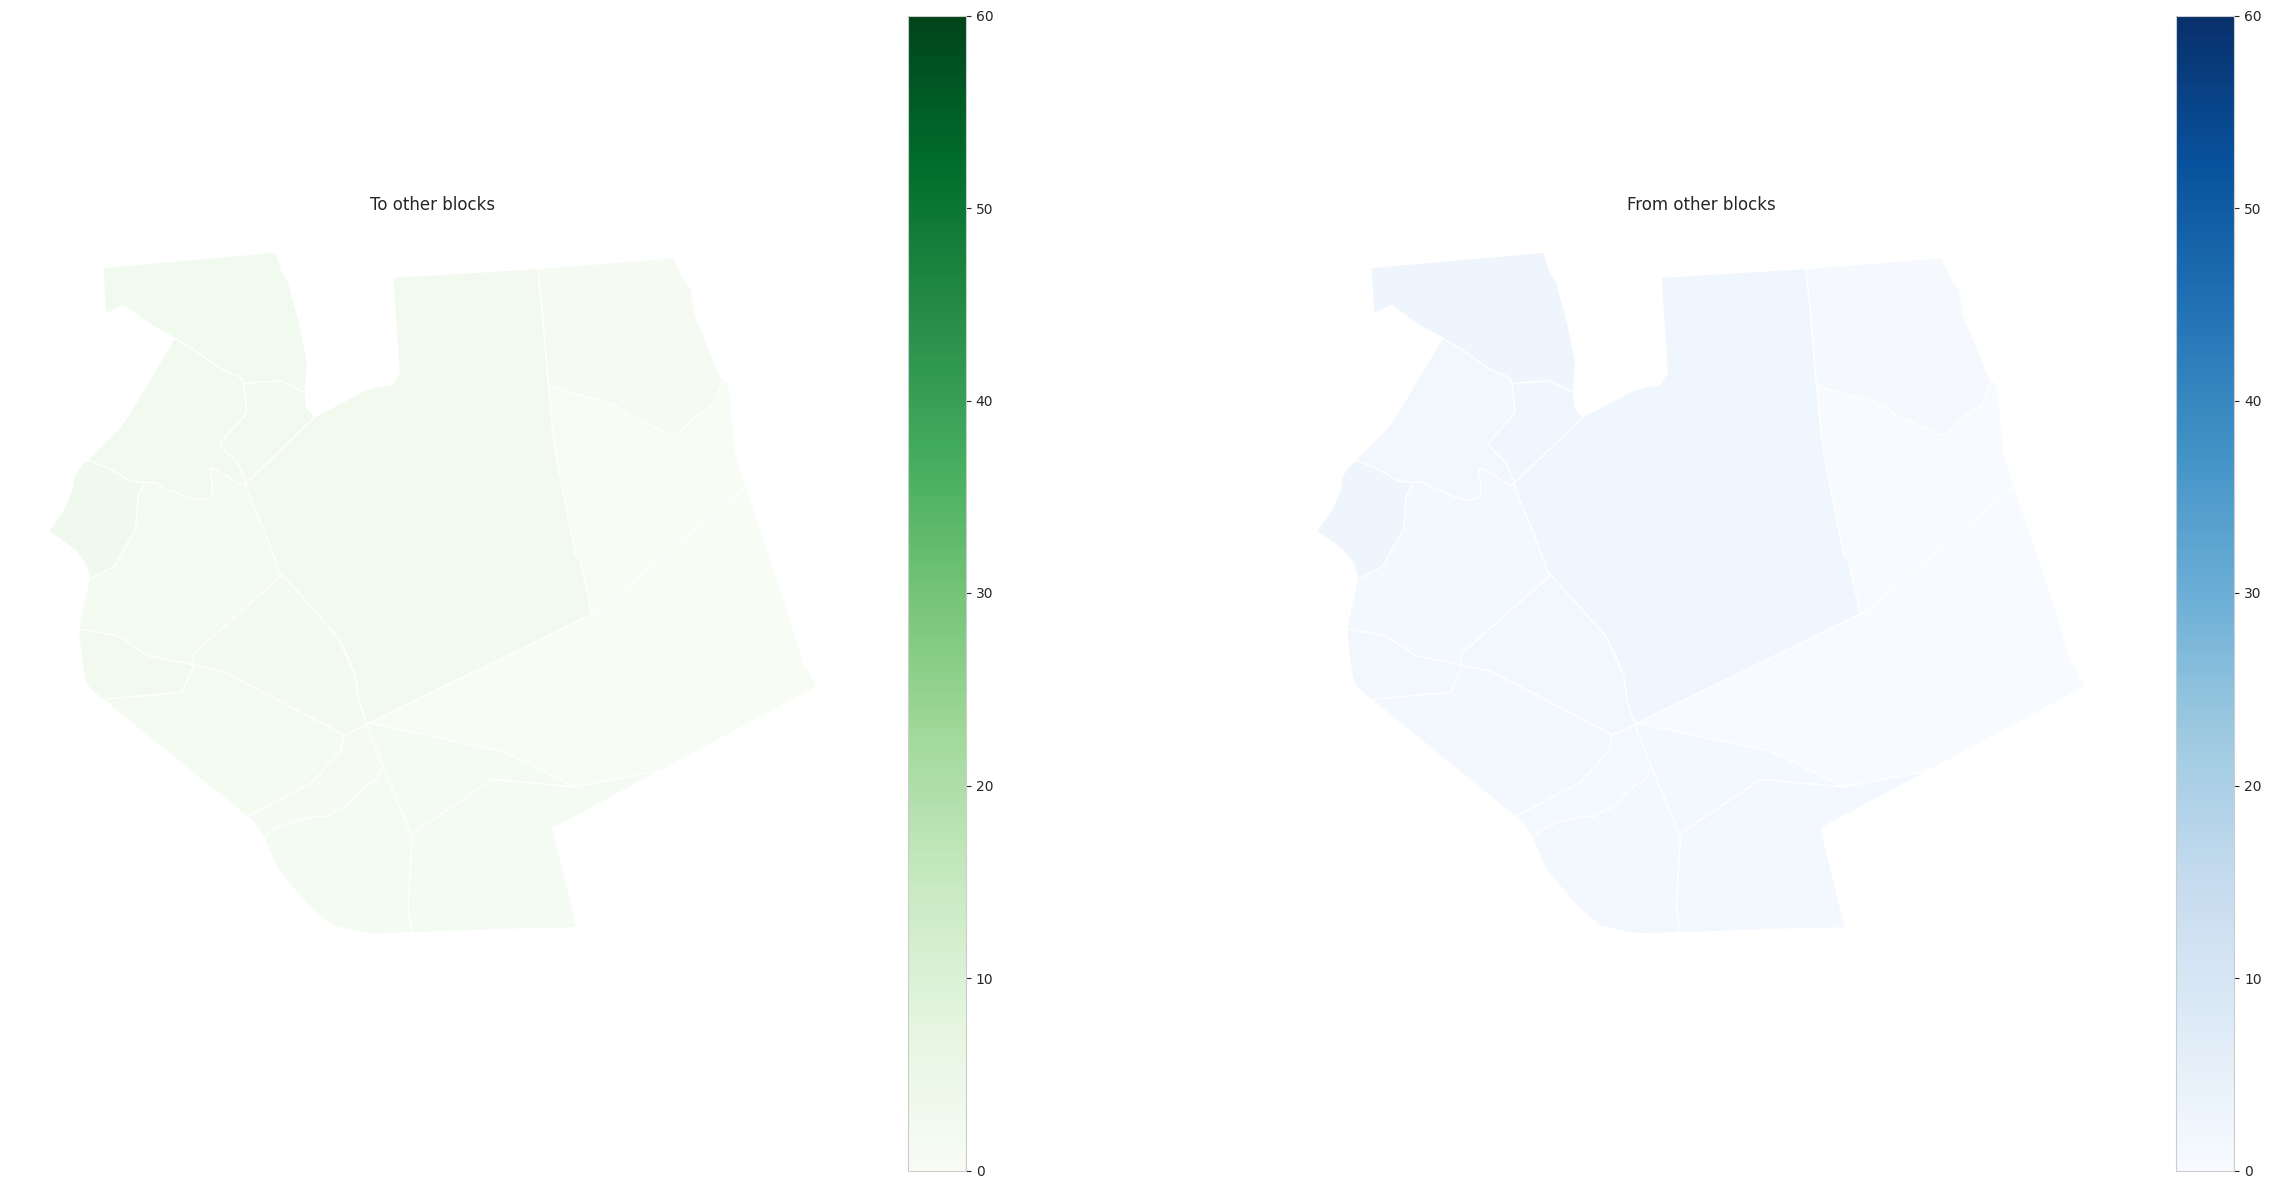

In [ ]:
Accessibility.plot(result, linewidth=0.9, figsize=(30,15))

In [ ]:
result.to_file('accessibility_2.geojson')

In [ ]:
connectivity = Connectivity(city_model=city)
connectivity_result = connectivity.calculate()
connectivity_result

,geometry,connectivity
id,,
0,"POLYGON ((346623.030 6610712.490, 346664.990 6...",1.505859
1,"POLYGON ((346129.832 6611304.750, 346144.103 6...",2.265625
2,"POLYGON ((347122.993 6610255.428, 347144.115 6...",1.364258
3,"POLYGON ((347456.726 6609919.567, 347471.714 6...",1.364258
4,"POLYGON ((347312.231 6610598.844, 348139.273 6...",1.541016
5,"POLYGON ((348621.556 6611860.812, 348629.309 6...",1.541016
6,"POLYGON ((347312.231 6610598.844, 347308.043 6...",1.364258
7,"POLYGON ((346514.378 6611488.920, 346525.493 6...",1.092773
8,"POLYGON ((346664.990 6610812.602, 346665.611 6...",1.149414


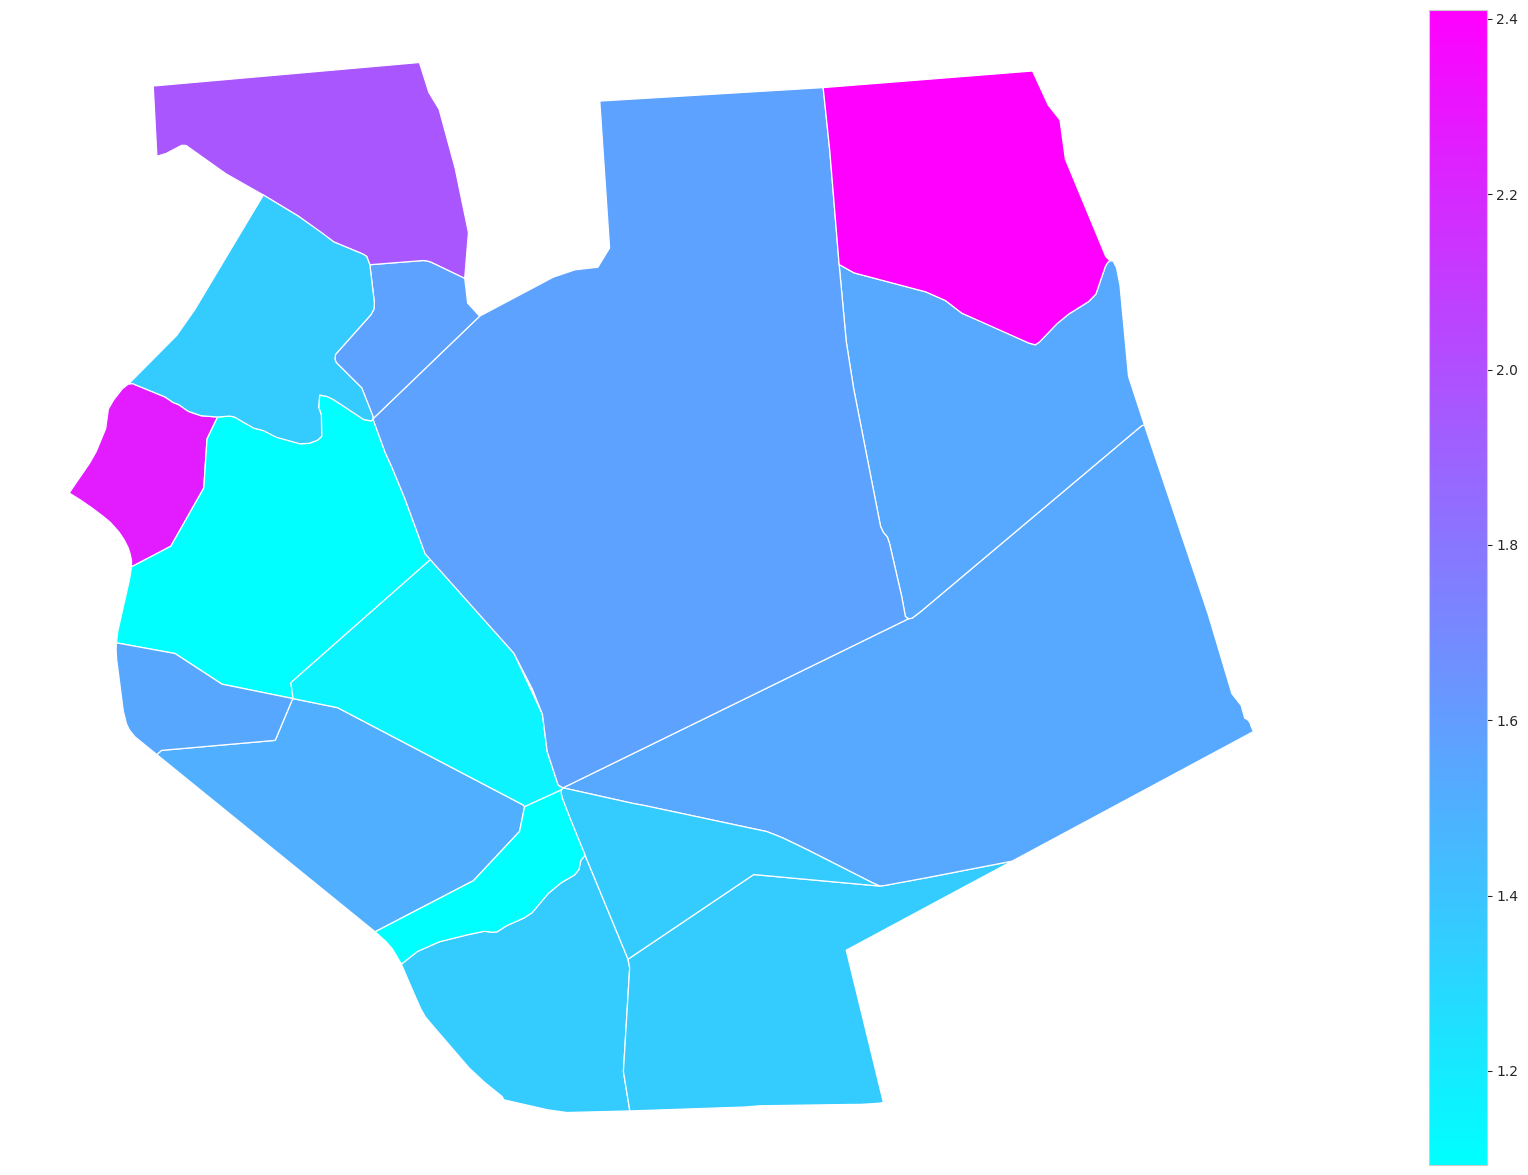

In [ ]:
Connectivity.plot(connectivity_result, linewidth=0.9, figsize=(30,15))

In [ ]:
result.to_file('connectivity_2.geojson')

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd

In [ ]:
accessibility_matrix = pd.read_pickle('acc_mx_2.pickle')

In [ ]:
Pudo = City.from_pickle('city_model_2.pickle')

# Оценка сервисного наполнения территории

**Загрузка зданий территории**

In [ ]:
buildings = gpd.read_file('buildings_2.geojson')

In [ ]:
local_crs = buildings.estimate_utm_crs()
local_crs

<Projected CRS: EPSG:32636>
Name: WGS 84 / UTM zone 36N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 30°E and 36°E, northern hemisphere between equator and 84°N, onshore and offshore. Belarus. Cyprus. Egypt. Ethiopia. Finland. Israel. Jordan. Kenya. Lebanon. Moldova. Norway. Russian Federation. Saudi Arabia. Sudan. Syria. Türkiye (Turkey). Uganda. Ukraine.
- bounds: (30.0, 0.0, 36.0, 84.0)
Coordinate Operation:
- name: UTM zone 36N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
buildings = buildings.to_crs(local_crs)
buildings.crs

<Projected CRS: EPSG:32636>
Name: WGS 84 / UTM zone 36N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 30°E and 36°E, northern hemisphere between equator and 84°N, onshore and offshore. Belarus. Cyprus. Egypt. Ethiopia. Finland. Israel. Jordan. Kenya. Lebanon. Moldova. Norway. Russian Federation. Saudi Arabia. Sudan. Syria. Türkiye (Turkey). Uganda. Ukraine.
- bounds: (30.0, 0.0, 36.0, 84.0)
Coordinate Operation:
- name: UTM zone 36N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
buildings = buildings[buildings.geometry.type.isin(['Polygon', 'MultiPolygon'])]
buildings.head()

,fid,index,population,footprint_area,number_of_floors,capacity,build_floor_area,living_area,non_living_area,сервис,geometry
0,1,1,64,1569.689,4,NaN,6278.756,1255.751,5023.005,None,"MULTIPOLYGON (((346772.566 6610712.719, 346774..."
1,2,2,64,1569.689,4,NaN,6278.756,1255.751,5023.005,None,"MULTIPOLYGON (((346691.354 6610692.386, 346688..."
2,3,3,64,1569.689,4,NaN,6278.756,1255.751,5023.005,None,"MULTIPOLYGON (((346710.700 6610669.915, 346712..."
3,63,63,64,1569.698,4,NaN,6278.792,1255.758,5023.034,None,"MULTIPOLYGON (((347489.632 6610127.896, 347489..."
4,64,64,0,60.000,1,10.0,60.000,0.000,60.000,supermarket,"MULTIPOLYGON (((347585.066 6609852.149, 347536..."


In [ ]:
buildings = buildings.reset_index(drop=True)
buildings.head()

,fid,index,population,footprint_area,number_of_floors,capacity,build_floor_area,living_area,non_living_area,сервис,geometry
0,1,1,64,1569.689,4,NaN,6278.756,1255.751,5023.005,None,"MULTIPOLYGON (((346772.566 6610712.719, 346774..."
1,2,2,64,1569.689,4,NaN,6278.756,1255.751,5023.005,None,"MULTIPOLYGON (((346691.354 6610692.386, 346688..."
2,3,3,64,1569.689,4,NaN,6278.756,1255.751,5023.005,None,"MULTIPOLYGON (((346710.700 6610669.915, 346712..."
3,63,63,64,1569.698,4,NaN,6278.792,1255.758,5023.034,None,"MULTIPOLYGON (((347489.632 6610127.896, 347489..."
4,64,64,0,60.000,1,10.0,60.000,0.000,60.000,supermarket,"MULTIPOLYGON (((347585.066 6609852.149, 347536..."


In [ ]:
for colums in buildings.columns:
  print(colums)

fid
index
population
footprint_area
number_of_floors
capacity
build_floor_area
living_area
non_living_area
сервис
geometry


In [ ]:
Pudo.update_buildings(buildings) # загрузка зданий в модель

2024-12-23 21:37:13.965 | INFO     | blocksnet.models.city:update_buildings:1237 - Removing existing blocks from the model
2024-12-23 21:37:13.968 | INFO     | blocksnet.models.city:update_buildings:1241 - Joining buildings and blocks
Update blocks buildings: 100%|██████████| 3/3 [00:00<00:00, 181.42it/s]


,fid,index,population,footprint_area,number_of_floors,capacity,build_floor_area,living_area,non_living_area,сервис,geometry


In [ ]:
Pudo.get_buildings_gdf() # проверим результат

,block_id,geometry,population,footprint_area,build_floor_area,living_area,non_living_area,number_of_floors,is_living
id,,,,,,,,,
60,0,"POLYGON ((346692.698 6610476.064, 346656.937 6...",0,613.084071,505.000,0.000,505.000,1,False
64,0,"POLYGON ((346824.340 6610355.819, 346788.578 6...",0,613.084071,200.000,0.000,200.000,1,False
55,0,"POLYGON ((346481.630 6610584.083, 346443.285 6...",0,613.084071,75.000,0.000,75.000,1,False
56,0,"POLYGON ((346443.285 6610614.217, 346404.940 6...",0,613.084071,50.000,0.000,50.000,1,False
62,0,"POLYGON ((346742.590 6610375.746, 346706.829 6...",0,613.084071,150.000,0.000,150.000,1,False
...,...,...,...,...,...,...,...,...,...
9,3,"POLYGON ((347633.013 6610182.445, 347633.928 6...",64,1569.337249,6278.796,1255.759,5023.037,4,True
8,3,"POLYGON ((347695.319 6610224.605, 347696.235 6...",64,1569.337249,6278.800,1255.760,5023.040,4,True
13,3,"POLYGON ((347900.655 6610207.779, 347849.038 6...",64,1569.337249,6278.812,1255.762,5023.050,4,True


**Загрузка сервисов территории**

In [ ]:
bank = gpd.read_file('bank_2.geojson')

In [ ]:
bank = bank.to_crs(local_crs)
bank.crs

<Projected CRS: EPSG:32636>
Name: WGS 84 / UTM zone 36N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 30°E and 36°E, northern hemisphere between equator and 84°N, onshore and offshore. Belarus. Cyprus. Egypt. Ethiopia. Finland. Israel. Jordan. Kenya. Lebanon. Moldova. Norway. Russian Federation. Saudi Arabia. Sudan. Syria. Türkiye (Turkey). Uganda. Ukraine.
- bounds: (30.0, 0.0, 36.0, 84.0)
Coordinate Operation:
- name: UTM zone 36N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
bank_geometry = bank[['geometry']]
Pudo.update_services('bank', bank_geometry)
services_gdf = Pudo.get_services_gdf()
services_gdf.head()

,geometry,block_id,building_id,service_type,capacity,area,is_integrated
0,POINT (347362.098 6609852.654),2,47,bank,250,450.0,False


In [ ]:
bar = gpd.read_file('bar_2.geojson')

In [ ]:
bar = bar.to_crs(local_crs)
bar.crs

<Projected CRS: EPSG:32636>
Name: WGS 84 / UTM zone 36N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 30°E and 36°E, northern hemisphere between equator and 84°N, onshore and offshore. Belarus. Cyprus. Egypt. Ethiopia. Finland. Israel. Jordan. Kenya. Lebanon. Moldova. Norway. Russian Federation. Saudi Arabia. Sudan. Syria. Türkiye (Turkey). Uganda. Ukraine.
- bounds: (30.0, 0.0, 36.0, 84.0)
Coordinate Operation:
- name: UTM zone 36N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
bar_geometry = bar[['geometry']]
Pudo.update_services('bar', bar_geometry)
services_gdf = Pudo.get_services_gdf()
services_gdf.head()

,geometry,block_id,building_id,service_type,capacity,area,is_integrated
0,POINT (347362.098 6609852.654),2,47,bank,250,450.0,False
1,POINT (347894.214 6609877.486),3,42,bar,50,100.0,False


In [ ]:
bus_stop = gpd.read_file('bus_stop_2.geojson')

In [ ]:
bus_stop = bus_stop.to_crs(local_crs)
bus_stop.crs

<Projected CRS: EPSG:32636>
Name: WGS 84 / UTM zone 36N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 30°E and 36°E, northern hemisphere between equator and 84°N, onshore and offshore. Belarus. Cyprus. Egypt. Ethiopia. Finland. Israel. Jordan. Kenya. Lebanon. Moldova. Norway. Russian Federation. Saudi Arabia. Sudan. Syria. Türkiye (Turkey). Uganda. Ukraine.
- bounds: (30.0, 0.0, 36.0, 84.0)
Coordinate Operation:
- name: UTM zone 36N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
bus_stop_geometry = bus_stop[['geometry']]
Pudo.update_services('bus_stop', bus_stop_geometry)
services_gdf = Pudo.get_services_gdf()
services_gdf.head(10)

,geometry,block_id,building_id,service_type,capacity,area,is_integrated
0,POINT (346607.355 6610494.968),0,59,bus_stop,4,7.0,False
1,POINT (347362.098 6609852.654),2,47,bank,250,450.0,False
2,POINT (347360.576 6610327.565),2,27,bus_stop,4,7.0,False
3,POINT (348017.200 6609916.231),3,43,bus_stop,4,7.0,False
4,POINT (347738.186 6609869.510),3,39,bus_stop,4,7.0,False
5,POINT (347894.214 6609877.486),3,42,bar,50,100.0,False


In [ ]:
cafe = gpd.read_file('cafe_2.geojson')

In [ ]:
cafe = cafe.to_crs(local_crs)
cafe.crs

<Projected CRS: EPSG:32636>
Name: WGS 84 / UTM zone 36N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 30°E and 36°E, northern hemisphere between equator and 84°N, onshore and offshore. Belarus. Cyprus. Egypt. Ethiopia. Finland. Israel. Jordan. Kenya. Lebanon. Moldova. Norway. Russian Federation. Saudi Arabia. Sudan. Syria. Türkiye (Turkey). Uganda. Ukraine.
- bounds: (30.0, 0.0, 36.0, 84.0)
Coordinate Operation:
- name: UTM zone 36N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
cafe_geometry = cafe[['geometry']]
Pudo.update_services('cafe', cafe_geometry)
services_gdf = Pudo.get_services_gdf()
services_gdf.head(10)

,geometry,block_id,building_id,service_type,capacity,area,is_integrated
0,POINT (346810.742 6610376.998),0,64,cafe,65,280.0,False
1,POINT (346607.355 6610494.968),0,59,bus_stop,4,7.0,False
2,POINT (347139.641 6609933.107),2,51,cafe,65,280.0,False
3,POINT (347171.266 6609895.983),2,52,cafe,65,280.0,False
4,POINT (347362.098 6609852.654),2,47,bank,250,450.0,False
5,POINT (347360.576 6610327.565),2,27,bus_stop,4,7.0,False
6,POINT (348017.200 6609916.231),3,43,bus_stop,4,7.0,False
7,POINT (347738.186 6609869.510),3,39,bus_stop,4,7.0,False
8,POINT (347894.214 6609877.486),3,42,bar,50,100.0,False


In [ ]:
cinema = gpd.read_file('cinema_2.geojson')

In [ ]:
cinema = cinema.to_crs(local_crs)
cinema.crs

<Projected CRS: EPSG:32636>
Name: WGS 84 / UTM zone 36N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 30°E and 36°E, northern hemisphere between equator and 84°N, onshore and offshore. Belarus. Cyprus. Egypt. Ethiopia. Finland. Israel. Jordan. Kenya. Lebanon. Moldova. Norway. Russian Federation. Saudi Arabia. Sudan. Syria. Türkiye (Turkey). Uganda. Ukraine.
- bounds: (30.0, 0.0, 36.0, 84.0)
Coordinate Operation:
- name: UTM zone 36N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
cinema_geometry = cinema[['geometry']]
Pudo.update_services('cinema', cinema_geometry)
services_gdf = Pudo.get_services_gdf()
services_gdf

,geometry,block_id,building_id,service_type,capacity,area,is_integrated
0,POINT (346810.742 6610376.998),0,64,cafe,65,280.0,False
1,POINT (346581.794 6610567.656),0,57,cinema,350,1000.0,False
2,POINT (346607.355 6610494.968),0,59,bus_stop,4,7.0,False
3,POINT (347139.641 6609933.107),2,51,cafe,65,280.0,False
4,POINT (347171.266 6609895.983),2,52,cafe,65,280.0,False
5,POINT (347362.098 6609852.654),2,47,bank,250,450.0,False
6,POINT (347360.576 6610327.565),2,27,bus_stop,4,7.0,False
7,POINT (348017.200 6609916.231),3,43,bus_stop,4,7.0,False
8,POINT (347738.186 6609869.510),3,39,bus_stop,4,7.0,False
9,POINT (347894.214 6609877.486),3,42,bar,50,100.0,False


In [ ]:
hairdresser = gpd.read_file('hairdresser_2.geojson')

In [ ]:
hairdresser = hairdresser.to_crs(local_crs)
hairdresser.crs

<Projected CRS: EPSG:32636>
Name: WGS 84 / UTM zone 36N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 30°E and 36°E, northern hemisphere between equator and 84°N, onshore and offshore. Belarus. Cyprus. Egypt. Ethiopia. Finland. Israel. Jordan. Kenya. Lebanon. Moldova. Norway. Russian Federation. Saudi Arabia. Sudan. Syria. Türkiye (Turkey). Uganda. Ukraine.
- bounds: (30.0, 0.0, 36.0, 84.0)
Coordinate Operation:
- name: UTM zone 36N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
hairdresser_geometry = hairdresser[['geometry']]
Pudo.update_services('hairdresser', hairdresser_geometry)
services_gdf = Pudo.get_services_gdf()
services_gdf

,geometry,block_id,building_id,service_type,capacity,area,is_integrated
0,POINT (346810.742 6610376.998),0,64,cafe,65,280.0,False
1,POINT (346428.006 6610634.217),0,56,hairdresser,20,600.0,False
2,POINT (346581.794 6610567.656),0,57,cinema,350,1000.0,False
3,POINT (346607.355 6610494.968),0,59,bus_stop,4,7.0,False
4,POINT (347139.641 6609933.107),2,51,cafe,65,280.0,False
5,POINT (347171.266 6609895.983),2,52,cafe,65,280.0,False
6,POINT (347362.098 6609852.654),2,47,bank,250,450.0,False
7,POINT (347360.576 6610327.565),2,27,bus_stop,4,7.0,False
8,POINT (348017.200 6609916.231),3,43,bus_stop,4,7.0,False
9,POINT (347670.683 6609906.662),3,37,hairdresser,20,600.0,False


In [ ]:
kindergarten = gpd.read_file('kindergarten_2.geojson')

In [ ]:
kindergarten = kindergarten.to_crs(local_crs)
kindergarten.crs

<Projected CRS: EPSG:32636>
Name: WGS 84 / UTM zone 36N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 30°E and 36°E, northern hemisphere between equator and 84°N, onshore and offshore. Belarus. Cyprus. Egypt. Ethiopia. Finland. Israel. Jordan. Kenya. Lebanon. Moldova. Norway. Russian Federation. Saudi Arabia. Sudan. Syria. Türkiye (Turkey). Uganda. Ukraine.
- bounds: (30.0, 0.0, 36.0, 84.0)
Coordinate Operation:
- name: UTM zone 36N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
kindergarten_geometry = kindergarten[['geometry']]
Pudo.update_services('kindergarten', kindergarten_geometry)
services_gdf = Pudo.get_services_gdf()
services_gdf

,geometry,block_id,building_id,service_type,capacity,area,is_integrated
0,POINT (346679.101 6610497.243),0,60,kindergarten,80,230.0,False
1,POINT (346810.742 6610376.998),0,64,cafe,65,280.0,False
2,POINT (346428.006 6610634.217),0,56,hairdresser,20,600.0,False
3,POINT (346581.794 6610567.656),0,57,cinema,350,1000.0,False
4,POINT (346607.355 6610494.968),0,59,bus_stop,4,7.0,False
5,POINT (347139.641 6609933.107),2,51,cafe,65,280.0,False
6,POINT (347171.266 6609895.983),2,52,cafe,65,280.0,False
7,POINT (347362.098 6609852.654),2,47,bank,250,450.0,False
8,POINT (347360.576 6610327.565),2,27,bus_stop,4,7.0,False
9,POINT (348017.200 6609916.231),3,43,bus_stop,4,7.0,False


In [ ]:
mall = gpd.read_file('mall_2.geojson')

In [ ]:
mall = mall.to_crs(local_crs)
mall.crs

<Projected CRS: EPSG:32636>
Name: WGS 84 / UTM zone 36N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 30°E and 36°E, northern hemisphere between equator and 84°N, onshore and offshore. Belarus. Cyprus. Egypt. Ethiopia. Finland. Israel. Jordan. Kenya. Lebanon. Moldova. Norway. Russian Federation. Saudi Arabia. Sudan. Syria. Türkiye (Turkey). Uganda. Ukraine.
- bounds: (30.0, 0.0, 36.0, 84.0)
Coordinate Operation:
- name: UTM zone 36N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
mall_geometry = mall[['geometry']]
Pudo.update_services('mall', mall_geometry)
services_gdf = Pudo.get_services_gdf()
services_gdf

,geometry,block_id,building_id,service_type,capacity,area,is_integrated
0,POINT (346679.101 6610497.243),0,60,kindergarten,80,230.0,False
1,POINT (346810.742 6610376.998),0,64,cafe,65,280.0,False
2,POINT (346428.006 6610634.217),0,56,hairdresser,20,600.0,False
3,POINT (346543.449 6610597.790),0,58,mall,7000,10000.0,False
4,POINT (346581.794 6610567.656),0,57,cinema,350,1000.0,False
5,POINT (346607.355 6610494.968),0,59,bus_stop,4,7.0,False
6,POINT (347139.641 6609933.107),2,51,cafe,65,280.0,False
7,POINT (347171.266 6609895.983),2,52,cafe,65,280.0,False
8,POINT (347362.098 6609852.654),2,47,bank,250,450.0,False
9,POINT (347360.576 6610327.565),2,27,bus_stop,4,7.0,False


In [ ]:
pharmacy = gpd.read_file('pharmacy_2.geojson')

In [ ]:
pharmacy = pharmacy.to_crs(local_crs)
pharmacy.crs

<Projected CRS: EPSG:32636>
Name: WGS 84 / UTM zone 36N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 30°E and 36°E, northern hemisphere between equator and 84°N, onshore and offshore. Belarus. Cyprus. Egypt. Ethiopia. Finland. Israel. Jordan. Kenya. Lebanon. Moldova. Norway. Russian Federation. Saudi Arabia. Sudan. Syria. Türkiye (Turkey). Uganda. Ukraine.
- bounds: (30.0, 0.0, 36.0, 84.0)
Coordinate Operation:
- name: UTM zone 36N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
pharmacy_geometry = pharmacy[['geometry']]
Pudo.update_services('pharmacy', pharmacy_geometry)
services_gdf = Pudo.get_services_gdf()
services_gdf

,geometry,block_id,building_id,service_type,capacity,area,is_integrated
0,POINT (346679.101 6610497.243),0,60,kindergarten,80,230.0,False
1,POINT (346810.742 6610376.998),0,64,cafe,65,280.0,False
2,POINT (346466.351 6610604.083),0,55,pharmacy,30,40.0,False
3,POINT (346428.006 6610634.217),0,56,hairdresser,20,600.0,False
4,POINT (346543.449 6610597.790),0,58,mall,7000,10000.0,False
5,POINT (346581.794 6610567.656),0,57,cinema,350,1000.0,False
6,POINT (346607.355 6610494.968),0,59,bus_stop,4,7.0,False
7,POINT (347264.667 6609852.489),2,54,pharmacy,30,40.0,False
8,POINT (347139.641 6609933.107),2,51,cafe,65,280.0,False
9,POINT (347171.266 6609895.983),2,52,cafe,65,280.0,False


In [ ]:
police = gpd.read_file('police_2.geojson')

In [ ]:
police = police.to_crs(local_crs)
police.crs

<Projected CRS: EPSG:32636>
Name: WGS 84 / UTM zone 36N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 30°E and 36°E, northern hemisphere between equator and 84°N, onshore and offshore. Belarus. Cyprus. Egypt. Ethiopia. Finland. Israel. Jordan. Kenya. Lebanon. Moldova. Norway. Russian Federation. Saudi Arabia. Sudan. Syria. Türkiye (Turkey). Uganda. Ukraine.
- bounds: (30.0, 0.0, 36.0, 84.0)
Coordinate Operation:
- name: UTM zone 36N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
police_geometry = police[['geometry']]
Pudo.update_services('police', police_geometry)
services_gdf = Pudo.get_services_gdf()
services_gdf.head(10)

,geometry,block_id,building_id,service_type,capacity,area,is_integrated
0,POINT (346679.101 6610497.243),0,60,kindergarten,80,230.0,False
1,POINT (346810.742 6610376.998),0,64,cafe,65,280.0,False
2,POINT (346466.351 6610604.083),0,55,pharmacy,30,40.0,False
3,POINT (346428.006 6610634.217),0,56,hairdresser,20,600.0,False
4,POINT (346543.449 6610597.790),0,58,mall,7000,10000.0,False
5,POINT (346581.794 6610567.656),0,57,cinema,350,1000.0,False
6,POINT (346607.355 6610494.968),0,59,bus_stop,4,7.0,False
7,POINT (347264.667 6609852.489),2,54,pharmacy,30,40.0,False
8,POINT (347139.641 6609933.107),2,51,cafe,65,280.0,False
9,POINT (347133.485 6610001.460),2,50,police,60,700.0,False


In [ ]:
polyclinic = gpd.read_file('polyclinic_2.geojson')

In [ ]:
polyclinic = polyclinic.to_crs(local_crs)
polyclinic.crs

<Projected CRS: EPSG:32636>
Name: WGS 84 / UTM zone 36N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 30°E and 36°E, northern hemisphere between equator and 84°N, onshore and offshore. Belarus. Cyprus. Egypt. Ethiopia. Finland. Israel. Jordan. Kenya. Lebanon. Moldova. Norway. Russian Federation. Saudi Arabia. Sudan. Syria. Türkiye (Turkey). Uganda. Ukraine.
- bounds: (30.0, 0.0, 36.0, 84.0)
Coordinate Operation:
- name: UTM zone 36N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
polyclinic_geometry = polyclinic[['geometry']]
Pudo.update_services('polyclinic', polyclinic_geometry)
services_gdf = Pudo.get_services_gdf()
services_gdf.head(10)

,geometry,block_id,building_id,service_type,capacity,area,is_integrated
0,POINT (346679.101 6610497.243),0,60,kindergarten,80,230.0,False
1,POINT (346810.742 6610376.998),0,64,cafe,65,280.0,False
2,POINT (346466.351 6610604.083),0,55,pharmacy,30,40.0,False
3,POINT (346428.006 6610634.217),0,56,hairdresser,20,600.0,False
4,POINT (346543.449 6610597.790),0,58,mall,7000,10000.0,False
5,POINT (346581.794 6610567.656),0,57,cinema,350,1000.0,False
6,POINT (346607.355 6610494.968),0,59,bus_stop,4,7.0,False
7,POINT (347264.667 6609852.489),2,54,pharmacy,30,40.0,False
8,POINT (347139.641 6609933.107),2,51,cafe,65,280.0,False
9,POINT (347133.485 6610001.460),2,50,police,60,700.0,False


In [ ]:
school = gpd.read_file('school_2.geojson')

In [ ]:
school = school.to_crs(local_crs)
school.crs

<Projected CRS: EPSG:32636>
Name: WGS 84 / UTM zone 36N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 30°E and 36°E, northern hemisphere between equator and 84°N, onshore and offshore. Belarus. Cyprus. Egypt. Ethiopia. Finland. Israel. Jordan. Kenya. Lebanon. Moldova. Norway. Russian Federation. Saudi Arabia. Sudan. Syria. Türkiye (Turkey). Uganda. Ukraine.
- bounds: (30.0, 0.0, 36.0, 84.0)
Coordinate Operation:
- name: UTM zone 36N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
school_geometry = school[['geometry']]
Pudo.update_services('school', school_geometry)
services_gdf = Pudo.get_services_gdf()
services_gdf.head(10)

,geometry,block_id,building_id,service_type,capacity,area,is_integrated
0,POINT (346679.101 6610497.243),0,60,kindergarten,80,230.0,False
1,POINT (346810.742 6610376.998),0,64,cafe,65,280.0,False
2,POINT (346466.351 6610604.083),0,55,pharmacy,30,40.0,False
3,POINT (346428.006 6610634.217),0,56,hairdresser,20,600.0,False
4,POINT (346543.449 6610597.790),0,58,mall,7000,10000.0,False
5,POINT (346581.794 6610567.656),0,57,cinema,350,1000.0,False
6,POINT (346607.355 6610494.968),0,59,bus_stop,4,7.0,False
7,POINT (347264.667 6609852.489),2,54,pharmacy,30,40.0,False
8,POINT (347139.641 6609933.107),2,51,cafe,65,280.0,False
9,POINT (347133.485 6610001.460),2,50,police,60,700.0,False


In [ ]:
supermarket = gpd.read_file('supermarket_2.geojson')

In [ ]:
supermarket = supermarket.to_crs(local_crs)
supermarket.crs

<Projected CRS: EPSG:32636>
Name: WGS 84 / UTM zone 36N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 30°E and 36°E, northern hemisphere between equator and 84°N, onshore and offshore. Belarus. Cyprus. Egypt. Ethiopia. Finland. Israel. Jordan. Kenya. Lebanon. Moldova. Norway. Russian Federation. Saudi Arabia. Sudan. Syria. Türkiye (Turkey). Uganda. Ukraine.
- bounds: (30.0, 0.0, 36.0, 84.0)
Coordinate Operation:
- name: UTM zone 36N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
supermarket_geometry = supermarket[['geometry']]
Pudo.update_services('supermarket', supermarket_geometry)
services_gdf = Pudo.get_services_gdf()
services_gdf.head(15)

,geometry,block_id,building_id,service_type,capacity,area,is_integrated
0,POINT (346679.101 6610497.243),0,60,kindergarten,80,230.0,False
1,POINT (346810.742 6610376.998),0,64,cafe,65,280.0,False
2,POINT (346466.351 6610604.083),0,55,pharmacy,30,40.0,False
3,POINT (346428.006 6610634.217),0,56,hairdresser,20,600.0,False
4,POINT (346728.992 6610396.925),0,62,supermarket,300,200.0,False
5,POINT (346543.449 6610597.790),0,58,mall,7000,10000.0,False
6,POINT (346846.503 6610343.839),0,63,supermarket,300,200.0,False
7,POINT (346581.794 6610567.656),0,57,cinema,350,1000.0,False
8,POINT (346607.355 6610494.968),0,59,bus_stop,4,7.0,False
9,POINT (346693.231 6610430.084),0,61,supermarket,300,200.0,False


**Оценка обеспеченности кварталов сервисами**

In [ ]:
from blocksnet import Provision, ProvisionMethod

2024-12-23 22:02:13.462 | INFO     | blocksnet.method.provision:_lp_provision:320 - Setting an LP problem for accessibility = 30 : 3x1
2024-12-23 22:02:13.471 | INFO     | blocksnet.method.provision:_lp_provision:354 - Solving the problem
2024-12-23 22:02:13.582 | INFO     | blocksnet.method.provision:_lp_provision:358 - Restoring values from variables
2024-12-23 22:02:13.593 | SUCCESS  | blocksnet.method.provision:calculate:269 - Provision assessment finished


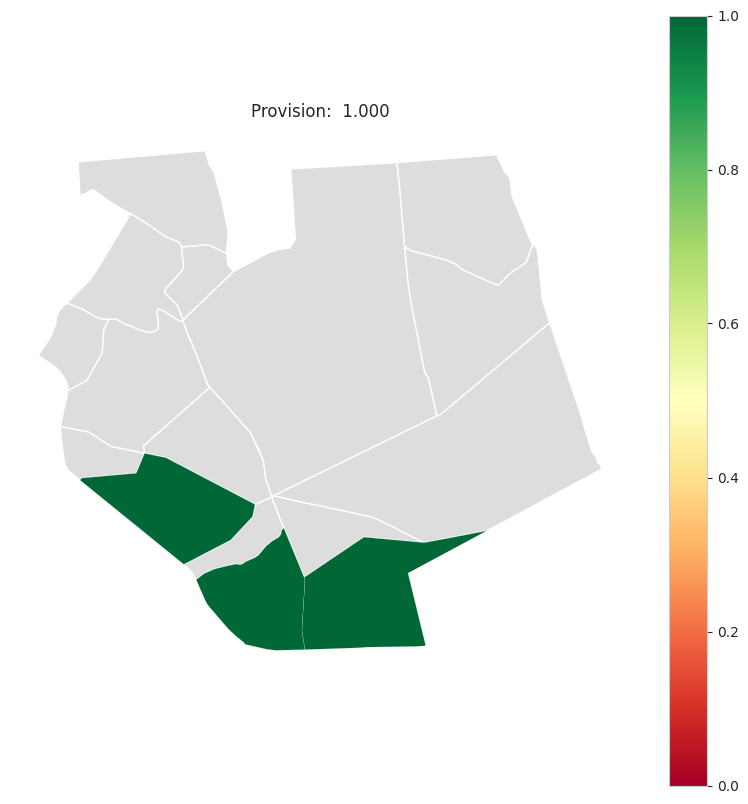

In [ ]:
service_type = 'bank'
prov = Provision(city_model=Pudo)
prov_res = prov.calculate(service_type)
prov.plot(prov_res)

2024-12-23 22:02:18.317 | INFO     | blocksnet.method.provision:_lp_provision:320 - Setting an LP problem for accessibility = 15 : 3x1
2024-12-23 22:02:18.321 | INFO     | blocksnet.method.provision:_lp_provision:354 - Solving the problem
2024-12-23 22:02:18.333 | INFO     | blocksnet.method.provision:_lp_provision:358 - Restoring values from variables
2024-12-23 22:02:18.340 | SUCCESS  | blocksnet.method.provision:calculate:269 - Provision assessment finished


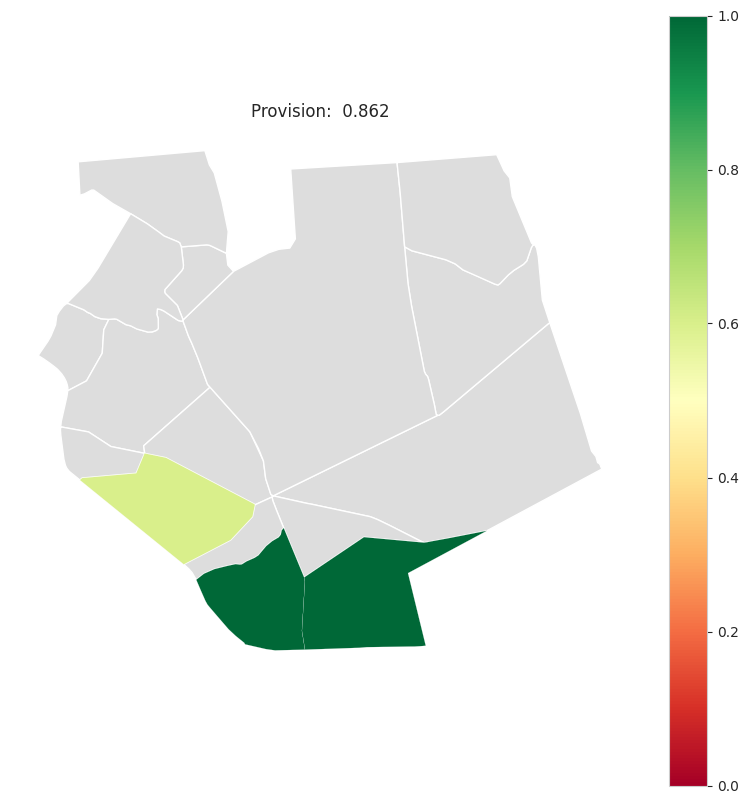

In [ ]:
service_type = 'bar'
prov = Provision(city_model=Pudo)
prov_res = prov.calculate(service_type)
prov.plot(prov_res)

2024-12-23 22:02:28.007 | INFO     | blocksnet.method.provision:_lp_provision:320 - Setting an LP problem for accessibility = 6 : 3x3
2024-12-23 22:02:28.012 | INFO     | blocksnet.method.provision:_lp_provision:354 - Solving the problem
2024-12-23 22:02:28.023 | INFO     | blocksnet.method.provision:_lp_provision:358 - Restoring values from variables
2024-12-23 22:02:28.031 | SUCCESS  | blocksnet.method.provision:calculate:269 - Provision assessment finished


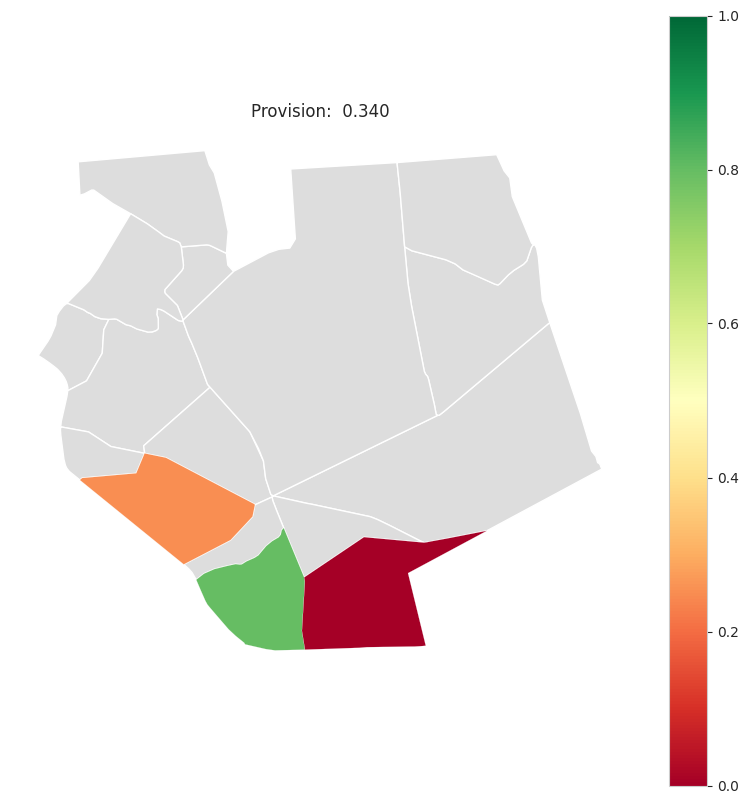

In [ ]:
service_type = 'bus_stop'
prov = Provision(city_model=Pudo)
prov_res = prov.calculate(service_type)
prov.plot(prov_res)

2024-12-23 22:02:37.622 | INFO     | blocksnet.method.provision:_lp_provision:320 - Setting an LP problem for accessibility = 15 : 3x2
2024-12-23 22:02:37.629 | INFO     | blocksnet.method.provision:_lp_provision:354 - Solving the problem
2024-12-23 22:02:37.644 | INFO     | blocksnet.method.provision:_lp_provision:358 - Restoring values from variables
2024-12-23 22:02:37.654 | SUCCESS  | blocksnet.method.provision:calculate:269 - Provision assessment finished


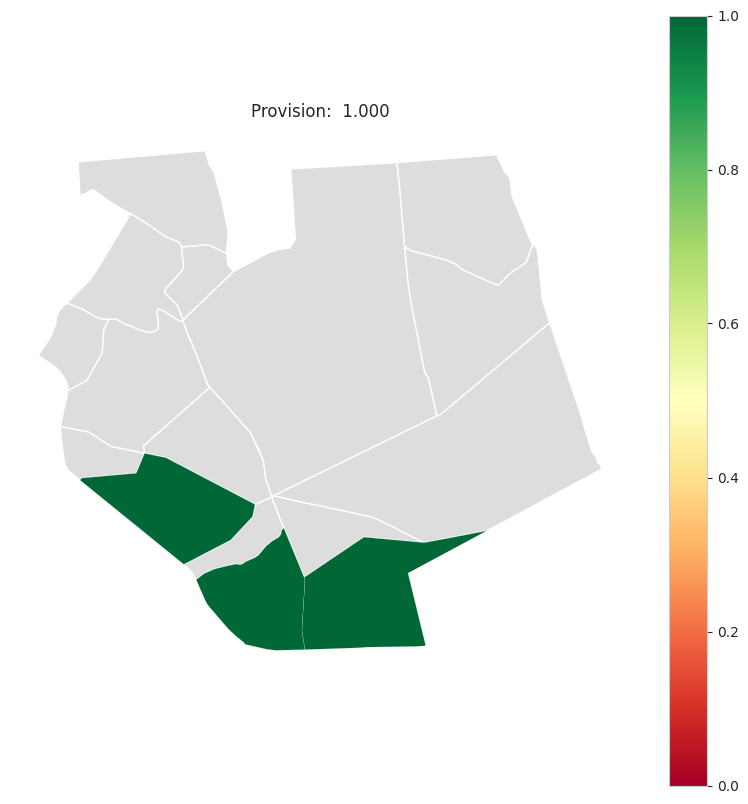

In [ ]:
service_type = 'cafe'
prov = Provision(city_model=Pudo)
prov_res = prov.calculate(service_type)
prov.plot(prov_res)

2024-12-23 22:03:00.154 | INFO     | blocksnet.method.provision:_lp_provision:320 - Setting an LP problem for accessibility = 60 : 3x1
2024-12-23 22:03:00.159 | INFO     | blocksnet.method.provision:_lp_provision:354 - Solving the problem
2024-12-23 22:03:00.168 | INFO     | blocksnet.method.provision:_lp_provision:358 - Restoring values from variables
2024-12-23 22:03:00.176 | SUCCESS  | blocksnet.method.provision:calculate:269 - Provision assessment finished


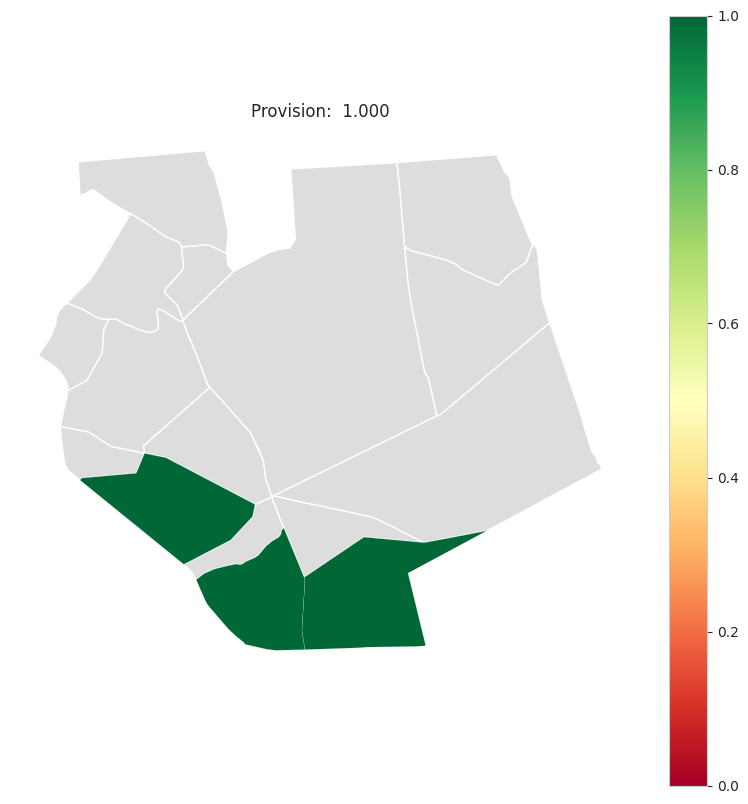

In [ ]:
service_type = 'cinema'
prov = Provision(city_model=Pudo)
prov_res = prov.calculate(service_type)
prov.plot(prov_res)

2024-12-23 22:03:04.740 | INFO     | blocksnet.method.provision:_lp_provision:320 - Setting an LP problem for accessibility = 15 : 3x2
2024-12-23 22:03:04.746 | INFO     | blocksnet.method.provision:_lp_provision:354 - Solving the problem
2024-12-23 22:03:04.763 | INFO     | blocksnet.method.provision:_lp_provision:358 - Restoring values from variables
2024-12-23 22:03:04.774 | SUCCESS  | blocksnet.method.provision:calculate:269 - Provision assessment finished


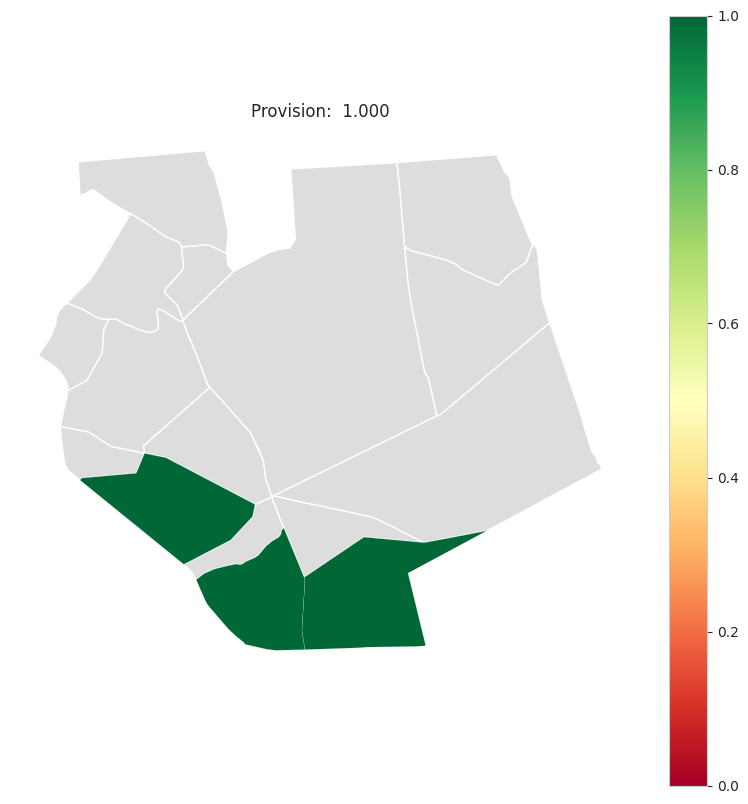

In [ ]:
service_type = 'hairdresser'
prov = Provision(city_model=Pudo)
prov_res = prov.calculate(service_type)
prov.plot(prov_res)

2024-12-23 22:03:14.486 | INFO     | blocksnet.method.provision:_lp_provision:320 - Setting an LP problem for accessibility = 7 : 3x2
2024-12-23 22:03:14.492 | INFO     | blocksnet.method.provision:_lp_provision:354 - Solving the problem
2024-12-23 22:03:14.508 | INFO     | blocksnet.method.provision:_lp_provision:358 - Restoring values from variables
2024-12-23 22:03:14.520 | SUCCESS  | blocksnet.method.provision:calculate:269 - Provision assessment finished


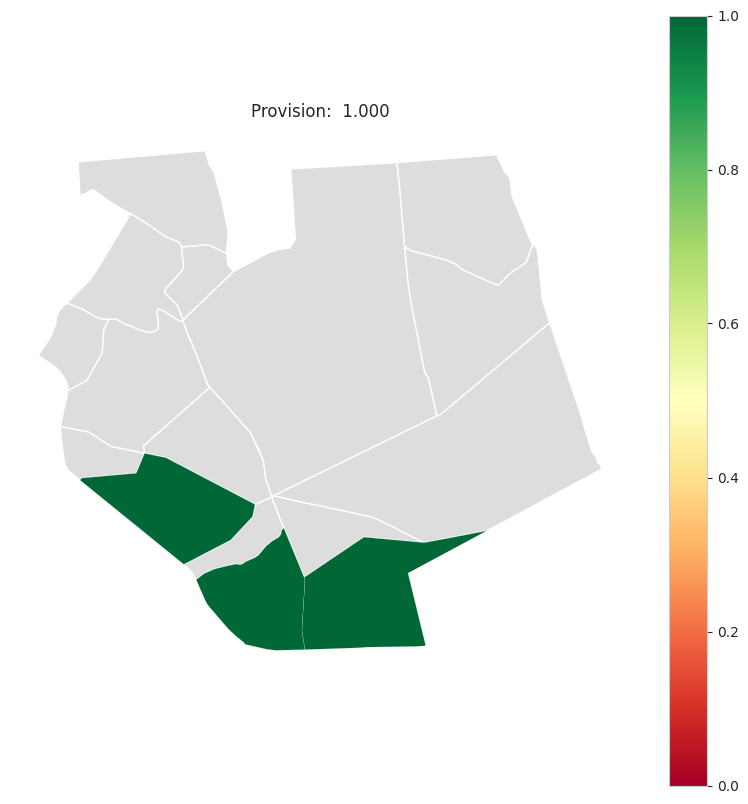

In [ ]:
service_type = 'kindergarten'
prov = Provision(city_model=Pudo)
prov_res = prov.calculate(service_type)
prov.plot(prov_res)

2024-12-23 22:03:26.480 | INFO     | blocksnet.method.provision:_lp_provision:320 - Setting an LP problem for accessibility = 30 : 3x1
2024-12-23 22:03:26.484 | INFO     | blocksnet.method.provision:_lp_provision:354 - Solving the problem
2024-12-23 22:03:26.496 | INFO     | blocksnet.method.provision:_lp_provision:358 - Restoring values from variables
2024-12-23 22:03:26.505 | SUCCESS  | blocksnet.method.provision:calculate:269 - Provision assessment finished


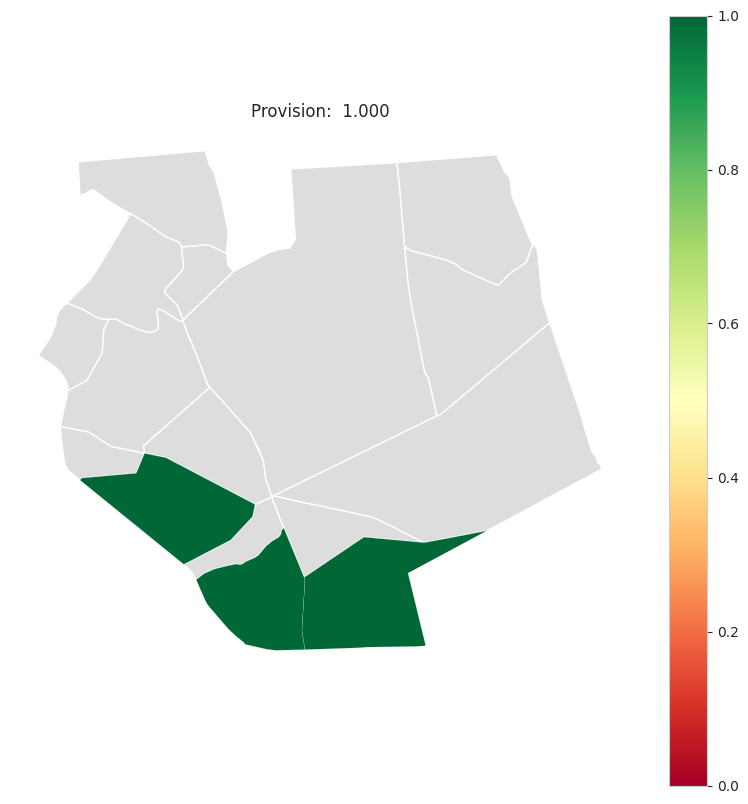

In [ ]:
service_type = 'mall'
prov = Provision(city_model=Pudo)
prov_res = prov.calculate(service_type)
prov.plot(prov_res)

2024-12-23 22:03:36.730 | INFO     | blocksnet.method.provision:_lp_provision:320 - Setting an LP problem for accessibility = 15 : 3x3
2024-12-23 22:03:36.734 | INFO     | blocksnet.method.provision:_lp_provision:354 - Solving the problem
2024-12-23 22:03:36.745 | INFO     | blocksnet.method.provision:_lp_provision:358 - Restoring values from variables
2024-12-23 22:03:36.754 | SUCCESS  | blocksnet.method.provision:calculate:269 - Provision assessment finished


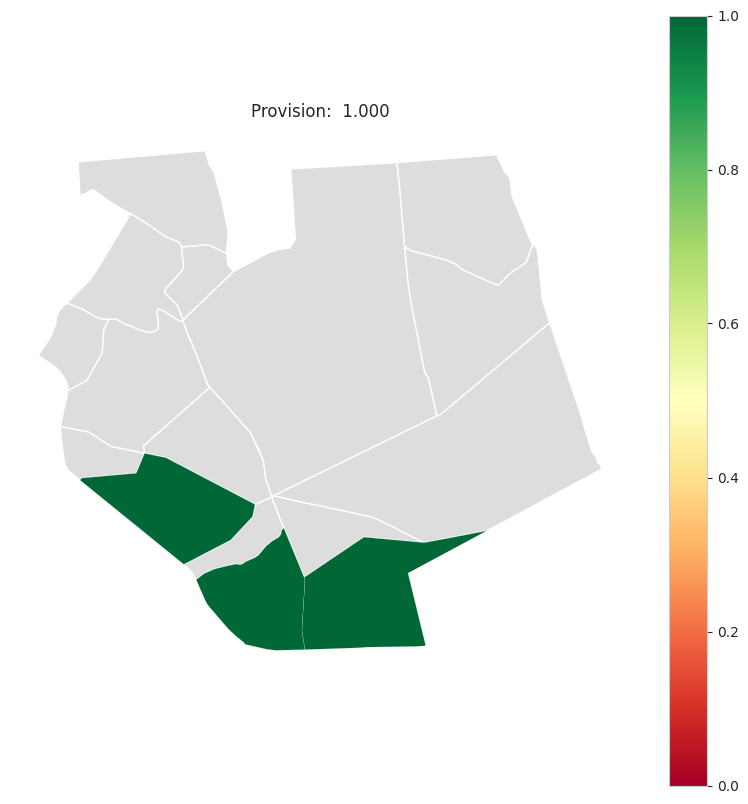

In [ ]:
service_type = 'pharmacy'
prov = Provision(city_model=Pudo)
prov_res = prov.calculate(service_type)
prov.plot(prov_res)

2024-12-23 22:05:41.058 | INFO     | blocksnet.method.provision:_lp_provision:320 - Setting an LP problem for accessibility = 10 : 3x1
2024-12-23 22:05:41.061 | INFO     | blocksnet.method.provision:_lp_provision:354 - Solving the problem
2024-12-23 22:05:41.073 | INFO     | blocksnet.method.provision:_lp_provision:358 - Restoring values from variables
2024-12-23 22:05:41.080 | SUCCESS  | blocksnet.method.provision:calculate:269 - Provision assessment finished


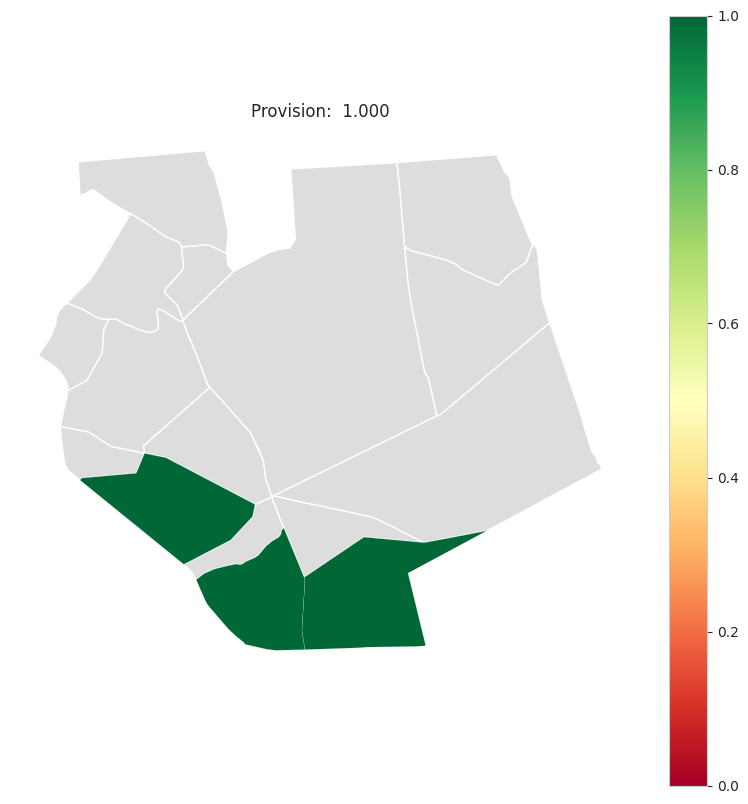

In [ ]:
service_type = 'police'
prov = Provision(city_model=Pudo)
prov_res = prov.calculate(service_type)
prov.plot(prov_res)

2024-12-23 22:05:46.084 | INFO     | blocksnet.method.provision:_lp_provision:320 - Setting an LP problem for accessibility = 10 : 3x1
2024-12-23 22:05:46.086 | INFO     | blocksnet.method.provision:_lp_provision:354 - Solving the problem
2024-12-23 22:05:46.097 | INFO     | blocksnet.method.provision:_lp_provision:358 - Restoring values from variables
2024-12-23 22:05:46.106 | SUCCESS  | blocksnet.method.provision:calculate:269 - Provision assessment finished


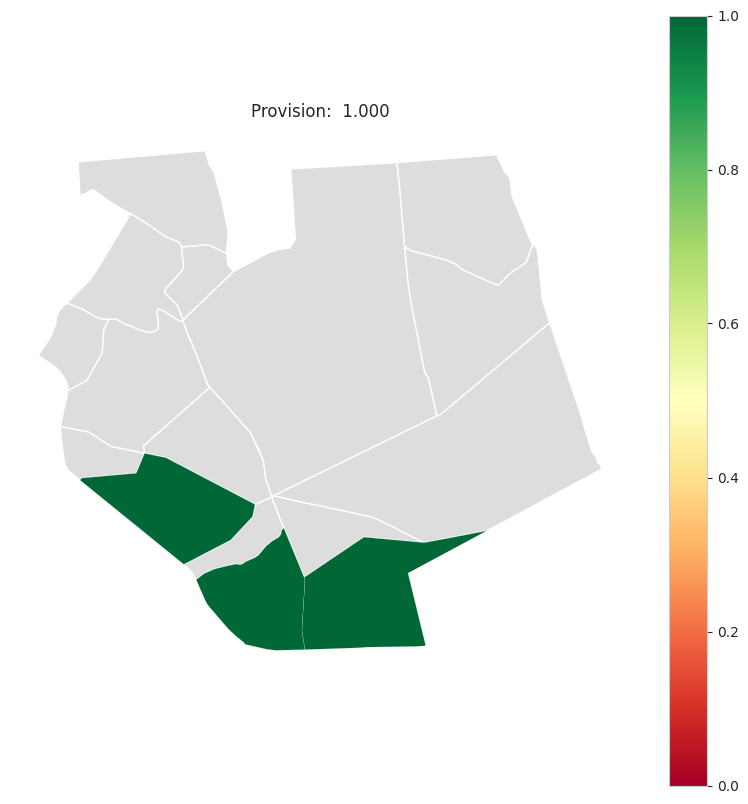

In [ ]:
service_type = 'polyclinic'
prov = Provision(city_model=Pudo)
prov_res = prov.calculate(service_type)
prov.plot(prov_res)

2024-12-23 22:05:55.179 | INFO     | blocksnet.method.provision:_lp_provision:320 - Setting an LP problem for accessibility = 15 : 3x1
2024-12-23 22:05:55.184 | INFO     | blocksnet.method.provision:_lp_provision:354 - Solving the problem
2024-12-23 22:05:55.199 | INFO     | blocksnet.method.provision:_lp_provision:358 - Restoring values from variables
2024-12-23 22:05:55.210 | SUCCESS  | blocksnet.method.provision:calculate:269 - Provision assessment finished


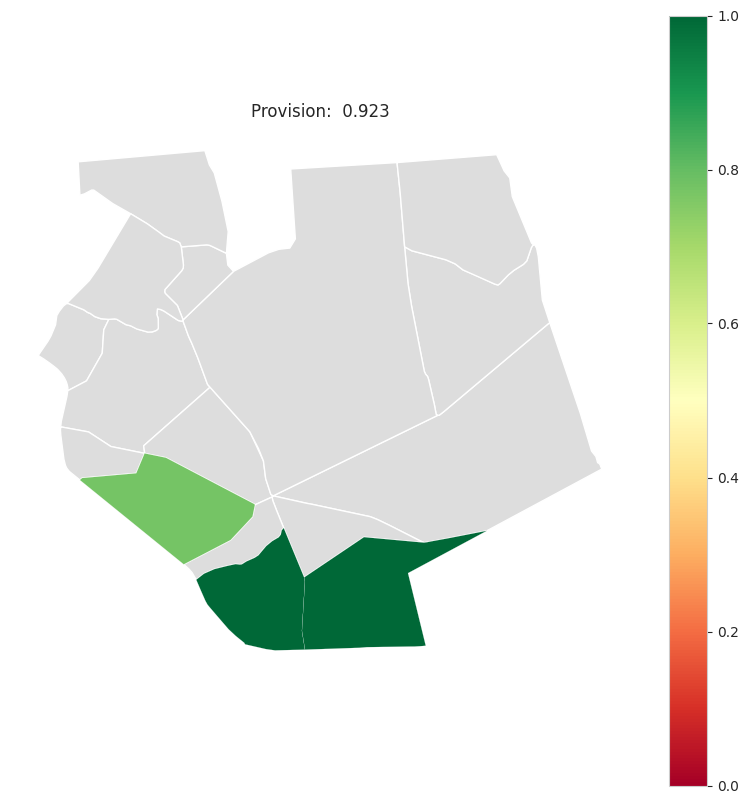

In [ ]:
service_type = 'school'
prov = Provision(city_model=Pudo)
prov_res = prov.calculate(service_type)
prov.plot(prov_res)

2024-12-23 22:06:01.839 | INFO     | blocksnet.method.provision:_lp_provision:320 - Setting an LP problem for accessibility = 15 : 3x3
2024-12-23 22:06:01.844 | INFO     | blocksnet.method.provision:_lp_provision:354 - Solving the problem
2024-12-23 22:06:01.854 | INFO     | blocksnet.method.provision:_lp_provision:358 - Restoring values from variables
2024-12-23 22:06:01.863 | SUCCESS  | blocksnet.method.provision:calculate:269 - Provision assessment finished


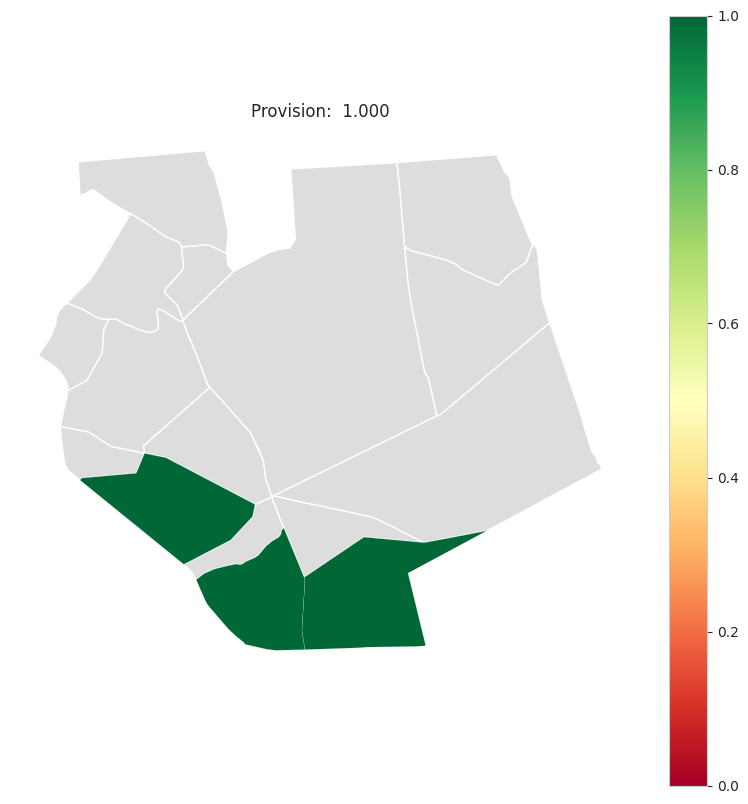

In [ ]:
service_type = 'supermarket'
prov = Provision(city_model=Pudo)
prov_res = prov.calculate(service_type)
prov.plot(prov_res)

**Оценка разнообразия сервисов в кварталах**

In [ ]:
from blocksnet import Diversity

In [ ]:
diversity = Diversity(city_model=Pudo)
result_devirsity = diversity.calculate()

In [ ]:
result_devirsity

,geometry,diversity
id,,
0,"POLYGON ((346623.030 6610712.490, 346664.990 6...",1.973001
1,"POLYGON ((346129.832 6611304.750, 346144.103 6...",NaN
2,"POLYGON ((347122.993 6610255.428, 347144.115 6...",1.834372
3,"POLYGON ((347456.726 6609919.567, 347471.714 6...",1.767761
4,"POLYGON ((347312.231 6610598.844, 348139.273 6...",NaN
5,"POLYGON ((348621.556 6611860.812, 348629.309 6...",NaN
6,"POLYGON ((347312.231 6610598.844, 347308.043 6...",NaN
7,"POLYGON ((346514.378 6611488.920, 346525.493 6...",NaN
8,"POLYGON ((346664.990 6610812.602, 346665.611 6...",NaN


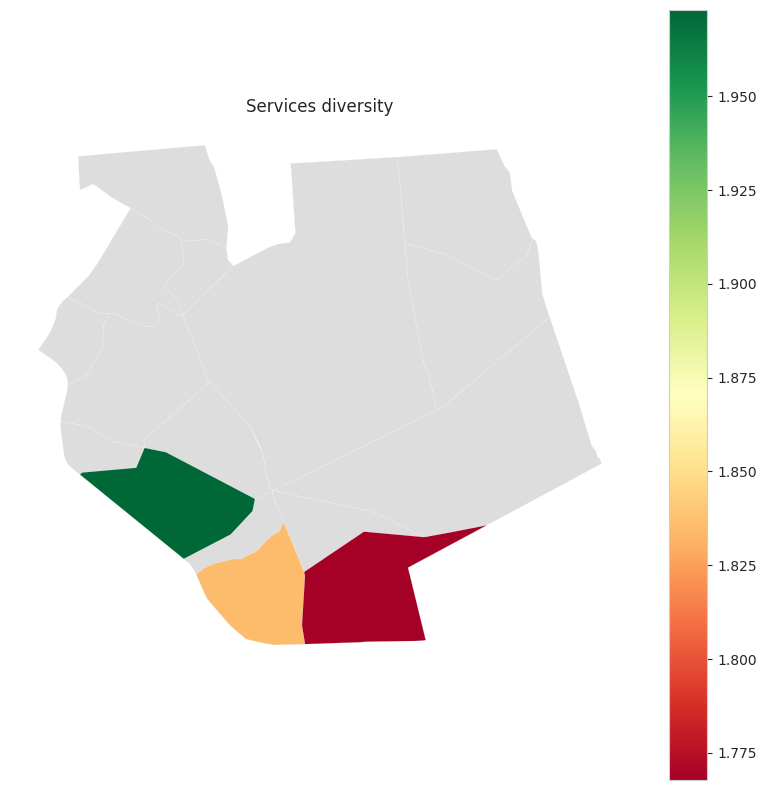

In [ ]:
Diversity.plot(result_devirsity, figsize =(10,10))

**Оценка центральности кварталов**

In [ ]:
from blocksnet import Centrality, PopulationCentrality

In [ ]:
centrality = Centrality(city_model=Pudo)
result_centrality = centrality.calculate()

In [ ]:
result_centrality

,geometry,connectivity,density,diversity,centrality
id,,,,,
0,"POLYGON ((346623.030 6610712.490, 346664.990 6...",1.505859,0.000041,1.973001,0.565108
1,"POLYGON ((346129.832 6611304.750, 346144.103 6...",2.265625,NaN,NaN,NaN
2,"POLYGON ((347122.993 6610255.428, 347144.115 6...",1.364258,0.000048,1.834372,0.510209
3,"POLYGON ((347456.726 6609919.567, 347471.714 6...",1.364258,0.000036,1.767761,0.068693
4,"POLYGON ((347312.231 6610598.844, 348139.273 6...",1.541016,NaN,NaN,NaN
5,"POLYGON ((348621.556 6611860.812, 348629.309 6...",1.541016,NaN,NaN,NaN
6,"POLYGON ((347312.231 6610598.844, 347308.043 6...",1.364258,NaN,NaN,NaN
7,"POLYGON ((346514.378 6611488.920, 346525.493 6...",1.092773,NaN,NaN,NaN
8,"POLYGON ((346664.990 6610812.602, 346665.611 6...",1.149414,NaN,NaN,NaN


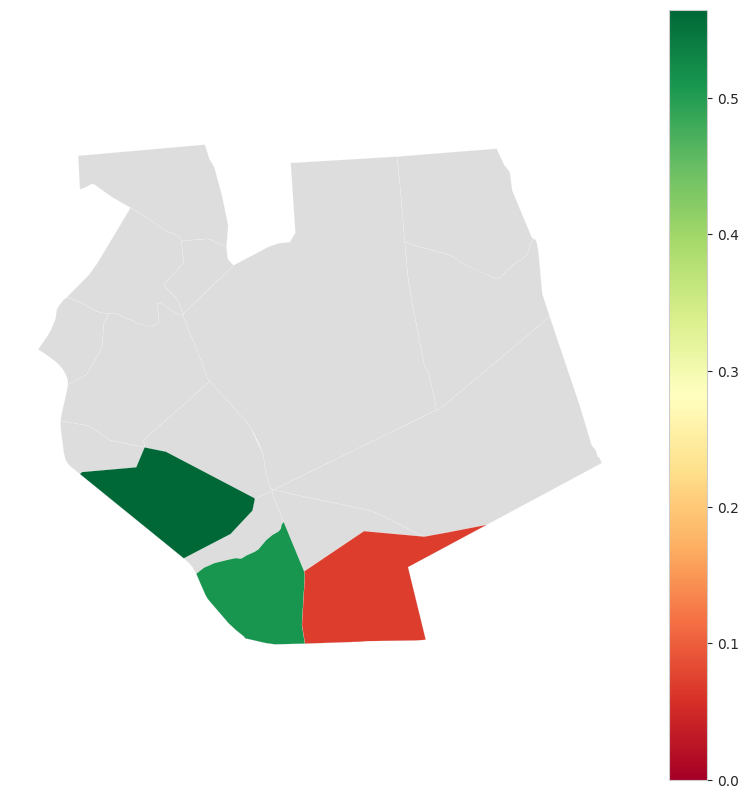

In [ ]:
Centrality.plot(result_centrality, figsize =(10,10))

In [ ]:
centrality_population = PopulationCentrality(city_model=Pudo)

In [ ]:
result_centrlity_population = centrality_population.calculate()

In [ ]:
result_centrlity_population

,geometry,population_centrality
id,,
0,"POLYGON ((346623.030 6610712.490, 346664.990 6...",10.00
1,"POLYGON ((346129.832 6611304.750, 346144.103 6...",2.78
2,"POLYGON ((347122.993 6610255.428, 347144.115 6...",7.27
3,"POLYGON ((347456.726 6609919.567, 347471.714 6...",6.67
4,"POLYGON ((347312.231 6610598.844, 348139.273 6...",1.11
5,"POLYGON ((348621.556 6611860.812, 348629.309 6...",0.56
6,"POLYGON ((347312.231 6610598.844, 347308.043 6...",2.22
7,"POLYGON ((346514.378 6611488.920, 346525.493 6...",3.89
8,"POLYGON ((346664.990 6610812.602, 346665.611 6...",4.44


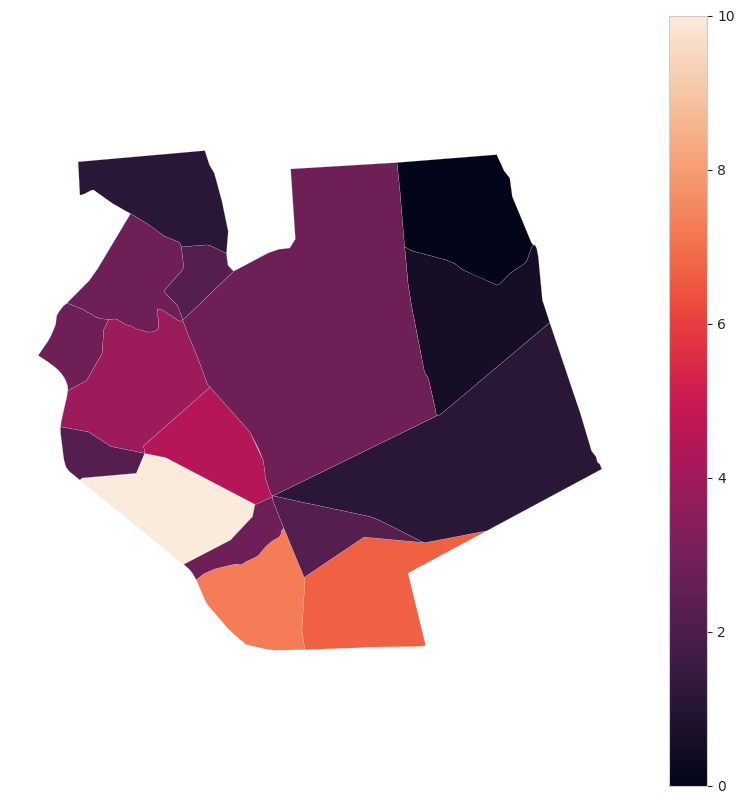

In [ ]:
PopulationCentrality.plot(result_centrlity_population, figsize =(10,10))

# Выводы

Данный сценарий развития территории может считаться удачным. Достигнута пороговая степень обеспеченности всеми сервисами социальной и досуговой инфраструктуры. Значение обеспеченности сервисами транспортной инфраструктуры находится на среднем уровне, однако является достаточным в условиях общей проблемной ситуации с общественным транспортом в поселении (увеличение количества автобусных остановок для достижения высокой степени обеспеченности ими проблему не решит). Большее развитие получили сервисы инфраструктуры досуга - их больше, они разнообразны. Степень общего разнообразия сервисов в кварталах существенно выше, нежели в первой и третьей гипотезах. Развитие новых кварталов согласно этой гипотезе влечёт повышение обеспеченности сервисами всего Пудомягского сельского поселения, в том числе в части образовательных и медицинских сервисов, что является существенной проблемой поселения.